In [1]:
import pandas as pd
import os
import numpy as np
import ast
import matplotlib.pyplot as plt
from scipy import stats


os.chdir("/home/gabri/Desktop/ADA/ADA_wikispeedia")
print(os.getcwd())

SAVE_FOLDER = "data_processed"

/home/gabri/Desktop/ADA/ADA_wikispeedia


## 1. **Transition Matrix Overview**
The **transition matrix** is a representation of how frequently users move from one article to another in a navigation path. The matrix shows transitions between articles and the probability of each transition.

### Transition Matrix Types:
- (**With Finished Paths:** Only includes transitions where the user reached a final goal or destination.) --> not used
- **With Both Finished and Unfinished Paths:** Includes all transitions, whether the user completed the journey or not.

### Objective:
- **Calculate Transition Frequency:** Determine how often each article is followed by another in all paths, providing a clear overview of user navigation.


In [2]:
if not os.path.exists("data/entropy_data/transition_matrix.csv"):

    print("Creating transition Matrix...")

    # read df with all the stesp (both in finsihed and finished paths)
    df_links = pd.read_csv("data_processed/links_processed.csv")
    df_articles = pd.read_csv("data_processed/articles_processed.csv")

    # Create an empty trnastion matrix with all possible combiantion of paths
    article_names = df_articles["article_id"]
    empty_matrix = pd.DataFrame(index=article_names, columns=article_names)
    empty_matrix.index.name = 'source'
    empty_matrix.columns.name = 'target'

    # Fill with NaN or any other value if desired (optional)
    empty_matrix.fillna(0, inplace=True)  # Fill with zeros instead of NaN

    print(empty_matrix.shape)
    print(empty_matrix)

    # Step 2: Create a transition matrix
        # Count occurrences of transitions
    for i, row in df_links.iterrows():
        source = row["link_source_id"]
        target = row["link_target_id"]
        empty_matrix.loc[source, target] += 1
        print(f"{source}, {target}\n\t{i}/{df_links.shape[0]} --> {100*i/df_links.shape[0]:.2f}%")

    # Step 3: Normalize to get probabilities
    transition_matrix = empty_matrix.div(empty_matrix.sum(axis=1), axis=0)

    # Display the transition matrix
    print("Transition Matrix:")
    print(transition_matrix)

    # Optional: Save to CSV for further analysis
    print("Saving matrix...")
    transition_matrix.to_csv("data/entropy_data/transition_matrix.csv")
    print("Saved matrix.")

else:
    transition_matrix = pd.read_csv("data/entropy_data/transition_matrix.csv", index=False)


Creating transition Matrix...


/tmp/ipykernel_1344607/1484966508.py:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  empty_matrix.fillna(0, inplace=True)  # Fill with zeros instead of NaN


(4604, 4604)
target  0     1     2     3     4     5     6     7     8     9     ...  4594  \
source                                                              ...         
0          0     0     0     0     0     0     0     0     0     0  ...     0   
1          0     0     0     0     0     0     0     0     0     0  ...     0   
2          0     0     0     0     0     0     0     0     0     0  ...     0   
3          0     0     0     0     0     0     0     0     0     0  ...     0   
4          0     0     0     0     0     0     0     0     0     0  ...     0   
...      ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
4599       0     0     0     0     0     0     0     0     0     0  ...     0   
4600       0     0     0     0     0     0     0     0     0     0  ...     0   
4601       0     0     0     0     0     0     0     0     0     0  ...     0   
4602       0     0     0     0     0     0     0     0     0     0  ...     0   
4603       0   

## 2. **Shannon Entropy for a Single Article**
**Shannon Entropy** measures the unpredictability or randomness in user transitions from one article to others.

- If an article leads to many different next articles with roughly equal probabilities, the entropy will be high.
  
### High Entropy:
- **Indicates:** Users are transitioning from this article to many different articles without a clear dominant choice.
- **Possible Reasons:**
  - **Cognitive Load:** Users might be uncertain about which link to click next or are exploring multiple options.
  - **Unclear Navigation:** High-entropy areas may correspond to poor navigation design or overwhelming choices, leading to user confusion or cognitive overload.

### Implications of High Entropy:
- **Cognitive Overload:** Users may experience mental fatigue due to unclear paths.
- **Exploration vs. Confusion:** It may be an indicator of either natural exploration or poor design, depending on the context.

In [3]:
# Function to calculate entropy for each row
def calculate_entropy(row):
    # Remove any zero probabilities to avoid log(0)
    probabilities = row[row > 0]
    return -np.sum(probabilities * np.log2(probabilities))

transition_matrix = pd.read_csv("transition_matrix.csv")

transition_matrix['entropy'] = transition_matrix.apply(calculate_entropy, axis=1)

transition_matrix

source    0    1    2    3    4    5    6    7    8  ...      4595  \
0          0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
1          1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
2          2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
3          3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
4          4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
...      ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...       ...   
4599    4599  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
4600    4600  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
4601    4601  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
4602    4602  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.000000   
4603    4603  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.066667   

      4596  4597  4598  4599  4600  4601  4602  4603       entropy  
0      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      3.459432  
1      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      4.247928  
2      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0      2.321928  
3      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0     -1.754888  
4      0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0     -4.678072  
...    ...   ...   ...   ...   ...   ...   ...   ...           ...  
4599   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 -55950.304061  
4600   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 -55964.731153  
4601   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 -55978.926386  
4602   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 -55995.022396  
4603   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0 -56007.048331  

[4604 rows x 4606 columns]

In [4]:
#checj for nan
missing_rows = transition_matrix[transition_matrix.isnull().any(axis=1)]
print(missing_rows.shape)
missing_rows

(17, 4606)


source   0   1   2   3   4   5   6   7   8  ...  4595  4596  4597  4598  \
441      441 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   NaN   NaN   NaN   NaN   
970      970 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   NaN   NaN   NaN   NaN   
1210    1210 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   NaN   NaN   NaN   NaN   
1231    1231 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   NaN   NaN   NaN   NaN   
1237    1237 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   NaN   NaN   NaN   NaN   
1257    1257 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   NaN   NaN   NaN   NaN   
2351    2351 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   NaN   NaN   NaN   NaN   
2530    2530 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   NaN   NaN   NaN   NaN   
2543    2543 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   NaN   NaN   NaN   NaN   
3108    3108 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   NaN   NaN   NaN   NaN   
3352    3352 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   NaN   NaN   NaN   NaN   
3645    3645 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   NaN   NaN   NaN   NaN   
3928    3928 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   NaN   NaN   NaN   NaN   
4289    4289 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   NaN   NaN   NaN   NaN   
4333    4333 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   NaN   NaN   NaN   NaN   
4480    4480 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   NaN   NaN   NaN   NaN   
4545    4545 NaN NaN NaN NaN NaN NaN NaN NaN NaN  ...   NaN   NaN   NaN   NaN   

      4599  4600  4601  4602  4603       entropy  
441    NaN   NaN   NaN   NaN   NaN  -3874.023967  
970    NaN   NaN   NaN   NaN   NaN  -9624.185709  
1210   NaN   NaN   NaN   NaN   NaN -12391.357512  
1231   NaN   NaN   NaN   NaN   NaN -12636.972122  
1237   NaN   NaN   NaN   NaN   NaN -12707.243044  
1257   NaN   NaN   NaN   NaN   NaN -12941.781551  
2351   NaN   NaN   NaN   NaN   NaN -26328.987294  
2530   NaN   NaN   NaN   NaN   NaN -28601.451824  
2543   NaN   NaN   NaN   NaN   NaN -28767.218944  
3108   NaN   NaN   NaN   NaN   NaN -36058.303610  
3352   NaN   NaN   NaN   NaN   NaN -39254.623166  
3645   NaN   NaN   NaN   NaN   NaN -43126.557797  
3928   NaN   NaN   NaN   NaN   NaN -46898.667154  
4289   NaN   NaN   NaN   NaN   NaN -51752.899401  
4333   NaN   NaN   NaN   NaN   NaN -52347.625209  
4480   NaN   NaN   NaN   NaN   NaN -54339.187916  
4545   NaN   NaN   NaN   NaN   NaN -55222.043512  

[17 rows x 4606 columns]

## 3. **Path-Based Entropy Analysis**

### Average Entropy of a Path:
- For each transition in a user path, calculate the **entropy of the source article** and accumulate it for the entire path. This gives a sense of how predictable or unpredictable the navigation experience is for that user journey.

### Types of Paths:
- **Finished Paths:** Users successfully reach the intended destination.
- **Unfinished Paths:** Users abandon the path before completing the journey.

### Global Entropy for Finished and Unfinished Paths:
- **Finished Paths:** Calculate the average entropy for paths that are completed. A low entropy value suggests that users were consistently guided toward the end goal.
- **Unfinished Paths:** Calculate the average entropy for paths that are abandoned. A high entropy value suggests that users might have experienced confusion or cognitive overload, leading them to abandon the navigation.

In [5]:
df_paths = pd.read_csv("data_processed/all_articles_processed.csv")
#display(df_paths)

#dict that map each srticle to the relative entripy
mapping_dict_entropy = pd.Series(transition_matrix.entropy.values, index=transition_matrix.source).to_dict()

#print(mapping_dict_entropy)

mean_entropies_path = []
for i, row in df_paths.iterrows():
    resolved_path_list_id = ast.literal_eval(row["resolved_path_list_id"])
    #print(resolved_path_list_id)
    if row["finished"] == True:
        # remove last elements (there is NO uncertaly after, the game is finsihed)
        resolved_path_list_id = resolved_path_list_id[:-1]
    #print(resolved_path_list_id)
    path_entropies = [mapping_dict_entropy[item] for item in resolved_path_list_id]  
    #print(path_entropies)
    mean_entropy = np.mean(path_entropies)
    if mean_entropy == None:
        print(i) 
    mean_entropies_path.append(mean_entropy)
    #print(f"{i}/{df_paths.shape[0]} --> {100*i/df_paths.shape[0]:.2f}%")


df_paths["entropy_path"] = mean_entropies_path

df_paths


/tmp/ipykernel_1344607/3474132688.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_paths = pd.read_csv("data_processed/all_articles_processed.csv")
/home/gabri/mambaforge/envs/ada/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/gabri/mambaforge/envs/ada/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


hashed_ip   timestamp  duration  \
0      6a3701d319fc3754  1297740409       166   
1      3824310e536af032  1344753412        88   
2      415612e93584d30e  1349298640       138   
3      64dd5cd342e3780c  1265613925        37   
4      015245d773376aab  1366730828       175   
...                 ...         ...       ...   
76188  109ed71f571d86e9  1389787605       180   
76189  232f992e57d43e8d  1389787697         6   
76190  2e09a7224600a7cd  1389798400      1900   
76191  60af9e2138051b96  1389799481      1903   
76192  1cf0cbb3281049ab  1389822841       352   

                                                    path  rating  \
0      14th_century;15th_century;16th_century;Pacific...     NaN   
1      14th_century;Europe;Africa;Atlantic_slave_trad...     3.0   
2      14th_century;Niger;Nigeria;British_Empire;Slav...     NaN   
3         14th_century;Renaissance;Ancient_Greece;Greece     NaN   
4      14th_century;Italy;Roman_Catholic_Church;HIV;R...     3.0   
...                                                  ...     ...   
76188  Franz_Kafka;Tuberculosis;World_Health_Organiza...     NaN   
76189                                     Modern_history     NaN   
76190  Computer_programming;Linguistics;Culture;Popul...     NaN   
76191  Jamaica;United_Kingdom;World_War_II;Battle_of_...     NaN   
76192          Mark_Antony;Rome;Tennis;Hawk-Eye;Computer     NaN   

                                               path_list  \
0      ['14th century', '15th century', '16th century...   
1      ['14th century', 'Europe', 'Africa', 'Atlantic...   
2      ['14th century', 'Niger', 'Nigeria', 'British ...   
3      ['14th century', 'Renaissance', 'Ancient Greec...   
4      ['14th century', 'Italy', 'Roman Catholic Chur...   
...                                                  ...   
76188  ['Franz Kafka', 'Tuberculosis', 'World Health ...   
76189                                 ['Modern history']   
76190  ['Computer programming', 'Linguistics', 'Cultu...   
76191  ['Jamaica', 'United Kingdom', 'World War II', ...   
76192  ['Mark Antony', 'Rome', 'Tennis', 'Hawk-Eye', ...   

                source_link          target_link  finished type_unfinished  \
0              14th century  African slave trade      True             NaN   
1              14th century  African slave trade      True             NaN   
2              14th century  African slave trade      True             NaN   
3              14th century               Greece      True             NaN   
4              14th century      John F. Kennedy      True             NaN   
...                     ...                  ...       ...             ...   
76188           Franz Kafka              Cholera     False         restart   
76189        Modern history            Hollandic     False         restart   
76190  Computer programming          The_Beatles     False         timeout   
76191               Jamaica          Alan_Turing     False         timeout   
76192           Mark Antony              Feather     False         restart   

       n_click  n_back                 date  click_rate  normalized_duration  \
0            9       0  2011-02-15 04:26:49    0.054217            18.444444   
1            5       0  2012-08-12 08:36:52    0.056818            17.600000   
2            8       0  2012-10-03 23:10:40    0.057971            17.250000   
3            4       0  2010-02-08 08:25:25    0.108108             9.250000   
4            7       0  2013-04-23 17:27:08    0.040000            25.000000   
...        ...     ...                  ...         ...                  ...   
76188        8       1  2014-01-15 13:06:45    0.044444            22.500000   
76189        1       0  2014-01-15 13:08:17    0.166667             6.000000   
76190        5       1  2014-01-15 16:06:40    0.002632           380.000000   
76191        4       0  2014-01-15 16:24:41    0.002102           475.750000   
76192        5       0  2014-01-15 22:54:01    0.014205            70.

## 4. **Visual Analysis with Graphs and T-test**
- **Transition Matrix Graphs:** Visualize the transition probabilities between articles to easily spot high-frequency paths and anomalies.

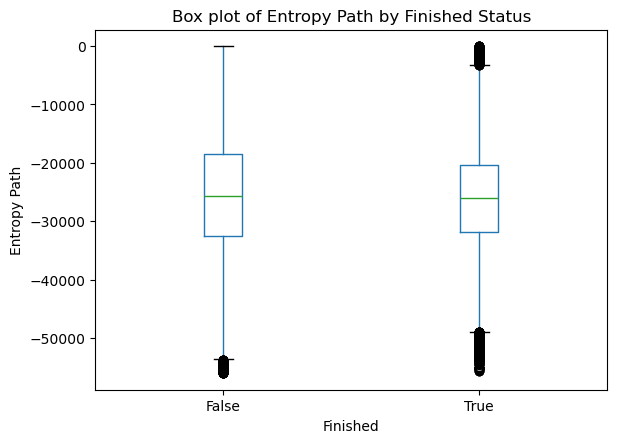

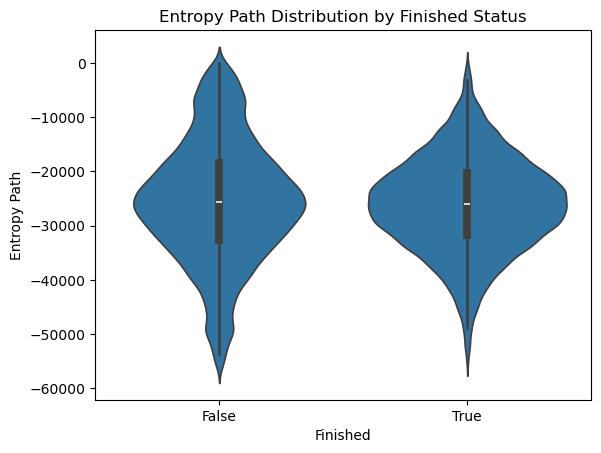

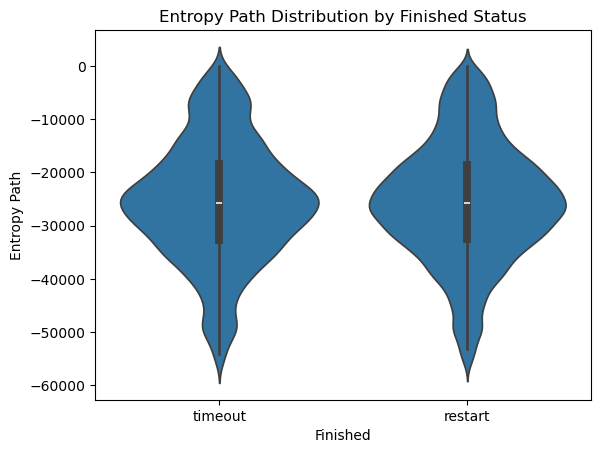

0.06026006920706253


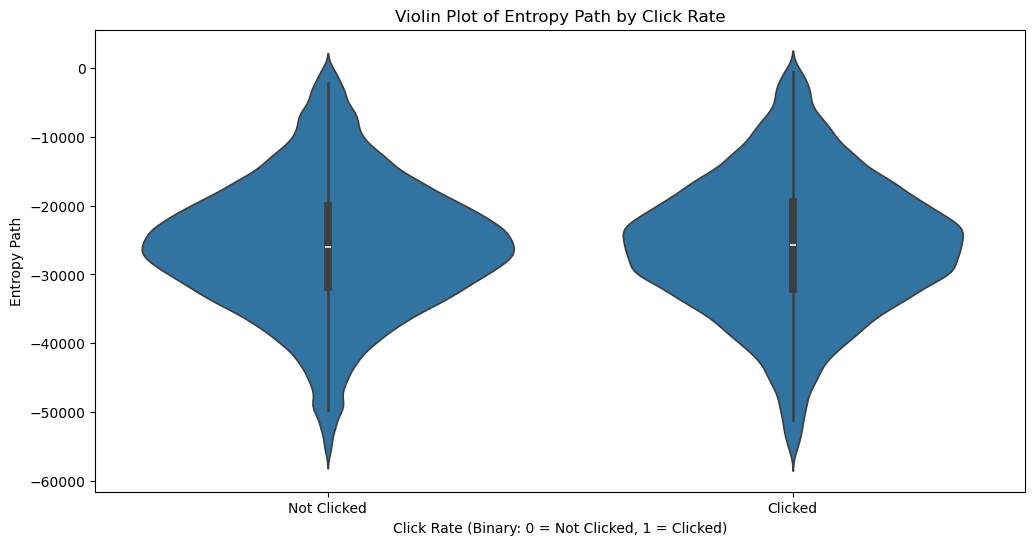

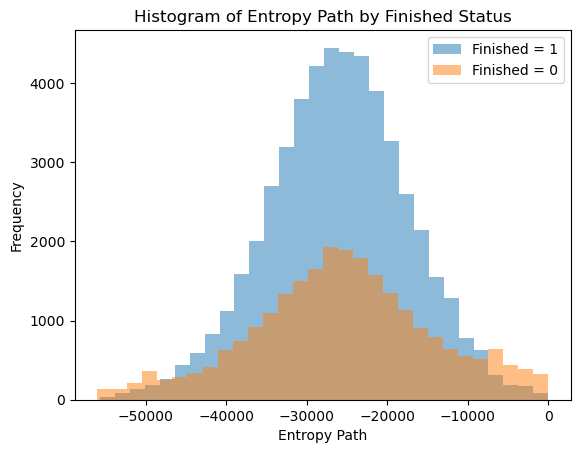

In [7]:

# Create the box plot
df_paths.boxplot(column="entropy_path", by="finished", grid=False)

# Optionally set titles and labels
plt.title('Box plot of Entropy Path by Finished Status')
plt.suptitle('')  # Suppress the default title to avoid duplication
plt.xlabel('Finished')
plt.ylabel('Entropy Path')

# Show the plot
plt.show()

import seaborn as sns

# Violin plot
sns.violinplot(x='finished', y='entropy_path', data=df_paths)
plt.title('Entropy Path Distribution by Finished Status')
plt.xlabel('Finished')
plt.ylabel('Entropy Path')
plt.show()

# Violin plot
sns.violinplot(x='type_unfinished', y='entropy_path', data=df_paths[df_paths["finished"] == False])
plt.title('Entropy Path Distribution by Finished Status')
plt.xlabel('Finished')
plt.ylabel('Entropy Path')
plt.show()

# Violin plot
# Define a threshold for click_rate (you can use mean or median)
threshold = df_paths['click_rate'].mean()
print(threshold)
df_paths['click_rate_binary'] = (df_paths['click_rate'] > threshold).astype(int)
plt.figure(figsize=(12, 6))
sns.violinplot(x='click_rate_binary', y='entropy_path', data=df_paths)
plt.xlabel('Click Rate (Binary: 0 = Not Clicked, 1 = Clicked)')
plt.ylabel('Entropy Path')
plt.title('Violin Plot of Entropy Path by Click Rate')
plt.xticks([0, 1], ['Not Clicked', 'Clicked'])
plt.show()


# Histogram
plt.hist(df_paths[df_paths['finished'] == 1]['entropy_path'].dropna(), bins=30, alpha=0.5, label='Finished = 1')
plt.hist(df_paths[df_paths['finished'] == 0]['entropy_path'].dropna(), bins=30, alpha=0.5, label='Finished = 0')
plt.title('Histogram of Entropy Path by Finished Status')
plt.xlabel('Entropy Path')
plt.ylabel('Frequency')
plt.legend()
plt.show()



In [8]:
# Check if 'entropy_path' and 'finished' columns exist and have valid data
if 'entropy_path' in df_paths.columns and 'finished' in df_paths.columns:
    # Separate the groups based on the 'finished' column
    group1 = df_paths[df_paths['finished'] == 1]['entropy_path'].dropna()  # Group where finished = 1
    group2 = df_paths[df_paths['finished'] == 0]['entropy_path'].dropna()  # Group where finished = 0

    # Perform an independent t-test
    t_stat, p_value = stats.ttest_ind(group1, group2, equal_var=False)  # Use equal_var=False for Welch's t-test

    # Print the results
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")

    # Interpret the p-value
    alpha = 0.05  # Significance level
    if p_value < alpha:
        print("Reject the null hypothesis: The means are significantly different.")
    else:
        print("Fail to reject the null hypothesis: The means are not significantly different.")
else:
    print("Required columns are missing from the DataFrame.")

T-statistic: -6.478958630878676
P-value: 9.34330550925472e-11
Reject the null hypothesis: The means are significantly different.


# Entropy and Degree (connectivity analysis)

- **Entropy Graphs:**
  - Highlight areas with high entropy to identify sections of the graph where users are most likely to experience cognitive overload.
  - **Finished vs Unfinished Path Entropy Comparison:** Compare the entropy distributions for finished and unfinished paths to detect problem areas in navigation.